In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors

## Set up

In [2]:
# Function to calculate entries
def spiral_coordinates(n):
    # If n = 1, we are at the centre
    if n == 1:
        return (0, 0)
    
    # Calculate k and d
    k = int(np.ceil((np.sqrt(n) - 1) / 2))
    d = (2 * k + 1) ** 2 - (n) 
    
    # Calculate the coordinates based
    # 0 <= d <= 2k
    if d <= 2 * k:
        return (k - d, -k)
    # 2k < d <= 4k
    elif d <= 4 * k:
        return (-k, -3 * k + d)
    # 4k < d <= 6k
    elif d <= 6 * k:
        return (-5 * k + d, k)
    # 6k < d <= (2k+1)^2
    else:
        return (k, 7 * k - d)

# Function to generate the spiral as a matrix
# Note that we generate it based off of the number of layers not the grid size - there is
# a one-to-one map between them so it doesnt matter which one we use
def generate_spiral(layers):
    # Calculate n using the number of layers
    N = 2 * layers - 1
    # Initialise the spiral matrix
    spiral = np.zeros((N, N), dtype=int)
    # Get the center (this is how we make (0,0) the centre through translation)
    center = N // 2
    
    # Loop over the entries of the matrix
    for n in range(1, N**2+1):
        # Get the coordinates of the entry
        x, y = spiral_coordinates(n)
        # Assign the value to the correct coordinate (appropriately translated using the center)
        spiral[center - y, center + x] = n
    
    return spiral

# Test:
layers = 3
spiral_matrix = generate_spiral(layers)
print(spiral_matrix)

[[17 16 15 14 13]
 [18  5  4  3 12]
 [19  6  1  2 11]
 [20  7  8  9 10]
 [21 22 23 24 25]]


## Diagrams of Spirals

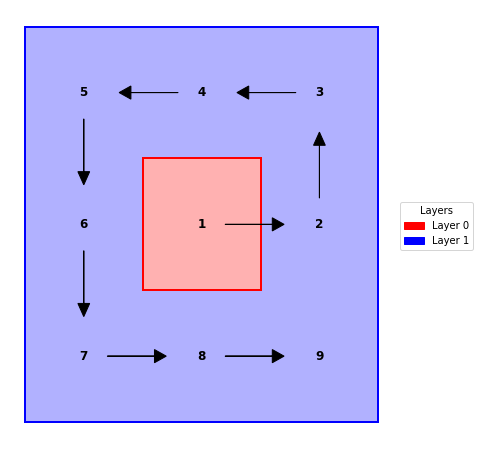

In [3]:
# Function to plot the spiral
def plot_spiral(spiral_matrix, show_layers = False):
    # Get the grid size of the spiral
    N = spiral_matrix.shape[0]
    # Create a figure
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Get rid of the x and y ticks and axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    
    # If show layers, we colour the layers
    if show_layers:
        # Define colors for the layers
        colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta']
        # Calculate the number of layers
        layers = (N - 1) // 2

        # Create a dictionary to store legend patches
        legend_patches = []

        # Fill cells based on their layer
        if N % 2 == 1:
            # Get the center in the case N is odd
            center = N // 2
        else:
            # Get the center in the case N is even
            center = (N-1) // 2
        for i in range(N):
            for j in range(N):
                # Get the number n from in the (i,j)th position
                n = spiral_matrix[i, j]
                
                # Double check the number is larger than 0
                if n > 0:
                    # Determine which layer the number belongs to
                    # Get the adjusted x and y distances
                    x_dist = abs(j - center)
                    y_dist = abs(i - center)
                    # Determine the layer that the point belongs to - The layer is determined by
                    # the maximum distance from center
                    layer = max(x_dist, y_dist)

                    # Fill cell with the layer color
                    rect = patches.Rectangle((j - 0.5, i - 0.5), 1, 1,
                                             linewidth=0, facecolor=colors[layer % len(colors)], alpha=0.3)
                    ax.add_patch(rect)

                    # Store legend patch if not already added
                    if layer == len(legend_patches):
                        legend_patches.append(patches.Patch(color=colors[layer % len(colors)], label=f'Layer {layer}'))

        # Add outlines to the layers
        # Loop over the layers
        for k in range(layers + 1):
            # Odd case
            if N % 2 == 1:
                lower = (N // 2) - k
                upper = (N // 2) + k
            # Even case
            else:
                lower = ((N - 1) // 2) - k
                upper = ((N - 1) // 2) + k
            # Calculate the width
            width = upper - lower
            
            # Add outline to the layer
            rect = patches.Rectangle((lower - 0.5, lower - 0.5), width + 1, width + 1,
                                     linewidth=2, edgecolor=colors[k % len(colors)], facecolor='none')
            ax.add_patch(rect)
            
        # Move legend outside the plot
        fig.subplots_adjust(right=0.8)
        legend_ax = fig.add_axes([0.82, 0.2, 0.1, 0.6])
        legend_ax.set_xticks([])
        legend_ax.set_yticks([])
        legend_ax.set_frame_on(False)
        legend_ax.legend(handles=legend_patches, loc="center", title="Layers")

    # Plot numbers
    # Dictionary to store the positions of the numbers
    positions = {}
    # Loop over the entries of the spiral matrix
    for i in range(N):
        for j in range(N):
            # Get the number n
            n = spiral_matrix[N-1-i, j]
            # Double check the number is greater than 0
            if n > 0:
                # Add the number to the plot
                ax.text(j, i, str(n), ha='center', va='center', fontsize=12, fontweight='bold', color='black')
                positions[n] = (j, i)

    # Plot arrows
    # Set the arrow size
    arrow_size = 0.4
    # Loop over the entries
    for n in range(1, N**2):
        # Check the next number is available
        if n + 1 in positions:
            # Get the coordinates of the current and next number
            x1, y1 = positions[n]
            x2, y2 = positions[n + 1]
            # Add arrows in direction based on the current and next coordinates
            if x1 > x2:
                ax.arrow(x1 - 0.2, y1, (x2 - x1) * arrow_size, (y2 - y1) * arrow_size, head_width=0.1, head_length=0.1, fc='black', ec='black')
            if x1 < x2:
                ax.arrow(x1 + 0.2, y1, (x2 - x1) * arrow_size, (y2 - y1) * arrow_size, head_width=0.1, head_length=0.1, fc='black', ec='black')
            if y1 > y2:
                ax.arrow(x1, y1 - 0.2, (x2 - x1) * arrow_size, (y2 - y1) * arrow_size, head_width=0.1, head_length=0.1, fc='black', ec='black')
            if y1 < y2:
                ax.arrow(x1, y1 + 0.2, (x2 - x1) * arrow_size, (y2 - y1) * arrow_size, head_width=0.1, head_length=0.1, fc='black', ec='black')
    
    # Show the plot
    plt.show()

# Test
layers = 2
plot_spiral(generate_spiral(layers), show_layers = True)

## Conjecture 2

In [4]:
# Function to calculate the lengths of the coordinate vectors
def calculate_coordinate_length(n):
    # Get the coordinate vector for n
    x, y = spiral_coordinates(n)
    # Return the length of the coordinate vector
    return np.sqrt(x**2 + y**2)

# Test
print(f"n=1: ||(x_n,y_n)||_2 = {calculate_coordinate_length(1)}")
print(f"n=2: ||(x_n,y_n)||_2 = {calculate_coordinate_length(2)}")
print(f"n=3: ||(x_n,y_n)||_2 = {calculate_coordinate_length(3)}")

n=1: ||(x_n,y_n)||_2 = 0.0
n=2: ||(x_n,y_n)||_2 = 1.0
n=3: ||(x_n,y_n)||_2 = 1.4142135623730951


In [5]:
# Function to calculate k_n
def calculate_k_n(n):
    return int(np.ceil((np.sqrt(n) - 1) / 2))

# Test
print(f"n=1: k_n = {calculate_k_n(1)}")
print(f"n=2: k_n = {calculate_k_n(2)}")
print(f"n=10: k_n = {calculate_k_n(10)}")

n=1: k_n = 0
n=2: k_n = 1
n=10: k_n = 2


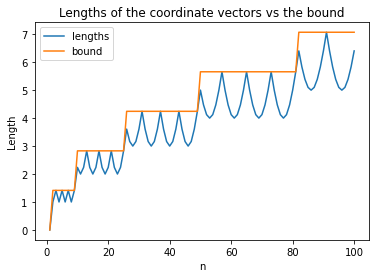

In [6]:
# Set the maximum n to consider
n_max = 100

# Get the n values from 1 to n_max
n_values = list(range(1,n_max+1))
# Get the lengths of the coordinate vectors for each n
lengths = [calculate_coordinate_length(n) for n in n_values]
# Get the bound for each n
bound = [calculate_k_n(n) * np.sqrt(2) for n in n_values]

# Plot bound vs lengths
plt.plot(n_values, lengths, label='lengths')
plt.plot(n_values, bound, label='bound')
plt.title('Lengths of the coordinate vectors vs the bound')
plt.xlabel('n')
plt.ylabel('Length')
plt.legend()
plt.show()

## Extensions

### Even N

In [7]:
# Function to generate the spiral when N is even
def generate_spiral_even(N):
    # Initialise the spiral matrix
    spiral = np.zeros((N, N), dtype=int)
    # Get the center of the matrix
    center = (N-1) // 2
    
    # Loop through the entries
    for n in range(1, N**2+1):
        # Get the coordinates of n
        x, y = spiral_coordinates(n)
        # Add n to the matrix in the correct place
        spiral[center - y + 1, center + x] = n
    
    return spiral

# Example usage:
N = 4  # Define the grid size
spiral_matrix_even = generate_spiral_even(N)
print(spiral_matrix_even)

[[16 15 14 13]
 [ 5  4  3 12]
 [ 6  1  2 11]
 [ 7  8  9 10]]


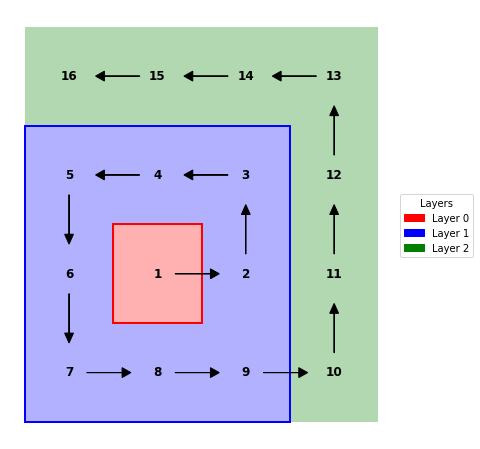

In [8]:
# Plot the spiral for N=4
plot_spiral(spiral_matrix_even, show_layers = True)